# **Analysis of Housing Data in Tehran**


We have a dataset of houses in Tehran and want to perform an analysis on them. The data is taken from Kaggle.com and includes the following features: Area, Room, Parking, Warehouse, Elevator, Address, Price, and Price (USD).

## Importing the necessary libraries:

In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the file: 
First, we load the housePrice.csv file.

In [27]:
df = pd.read_csv('housePrice.csv')
print(df.shape)
print(df.head())

(3479, 8)
,  Area  Room  Parking  Warehouse  Elevator         Address         Price  \
,0   63     1     True       True      True         Shahran  1.850000e+09   
,1   60     1     True       True      True         Shahran  1.850000e+09   
,2   79     2     True       True      True          Pardis  5.500000e+08   
,3   95     2     True       True      True   Shahrake Qods  9.025000e+08   
,4  123     2     True       True      True  Shahrake Gharb  7.000000e+09   
,
,   Price(USD)  
,0    61666.67  
,1    61666.67  
,2    18333.33  
,3    30083.33  
,4   233333.33  


## PreProcess:
Now, we need to remove NaN values and outliers from the dataset.
$$ IQR = IQ3 - IQ1 $$

In [28]:
df = df.dropna()

Q1 = df['Price(USD)'].quantile(0.25)
Q3 = df['Price(USD)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Price(USD)'] >= lower_bound) & (df['Price(USD)'] <= upper_bound)]
df.index = range(1, len(df) + 1)

print(df.shape)
print(df)

(3146, 8)
,     Area  Room  Parking  Warehouse  Elevator             Address  \
,1      63     1     True       True      True             Shahran   
,2      60     1     True       True      True             Shahran   
,3      79     2     True       True      True              Pardis   
,4      95     2     True       True      True       Shahrake Qods   
,5     123     2     True       True      True      Shahrake Gharb   
,...   ...   ...      ...        ...       ...                 ...   
,3142   86     2     True       True      True  Southern Janatabad   
,3143   83     2     True       True      True            Niavaran   
,3144   75     2    False      False     False              Parand   
,3145  105     2     True       True      True              Dorous   
,3146   82     2    False       True      True              Parand   
,
,             Price  Price(USD)  
,1     1.850000e+09    61666.67  
,2     1.850000e+09    61666.67  
,3     5.500000e+08    18333.33  
,4     9.025

Removing extra characters in the columns that disrupt calculations and converting the required numerical data into numbers to perform mathematical operations on them.

In [29]:
df['Price(USD)'] = pd.to_numeric(df['Price(USD)'])
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')


df['Price(USD)'] = df['Price(USD)'].astype(str).str.replace(' ', '').str.replace(',', '').astype(float)
df['Area'] = df['Area'].astype(str).str.replace(' ', '').str.replace(',', '').astype(float)

## Analysis and Process:

1. What is the average price of houses in different areas?

In [30]:
mean_prices = df.groupby('Address')['Price(USD)'].mean().reset_index(name='Mean Price(USD)')
mean_prices.index = range(1, len(mean_prices) + 1)

print(mean_prices[['Address', 'Mean Price(USD)']])

         Address  Mean Price(USD)
,1         Abazar    161613.635909
,2      Abbasabad    107666.665000
,3         Absard    141111.110000
,4         Abuzar     50944.443333
,5       Afsarieh     62222.221667
,..           ...              ...
,185  Yousef Abad    218254.630000
,186        Zafar    191644.445556
,187   Zaferanieh    339000.000000
,188    Zargandeh    235600.000000
,189    Zibadasht    145000.000000
,
,[189 rows x 2 columns]


2. How many houses are there in each area?

In [31]:
home_count = df.groupby('Address')['Area'].count().reset_index(name='Home Count')
home_count.index = range(1, len(home_count) + 1)

print(home_count[['Address', 'Home Count']])

         Address  Home Count
,1         Abazar          22
,2      Abbasabad           2
,3         Absard           6
,4         Abuzar           3
,5       Afsarieh           6
,..           ...         ...
,185  Yousef Abad          36
,186        Zafar           9
,187   Zaferanieh           7
,188    Zargandeh           4
,189    Zibadasht           1
,
,[189 rows x 2 columns]


3. What is the relationship between the area of a house and its price?

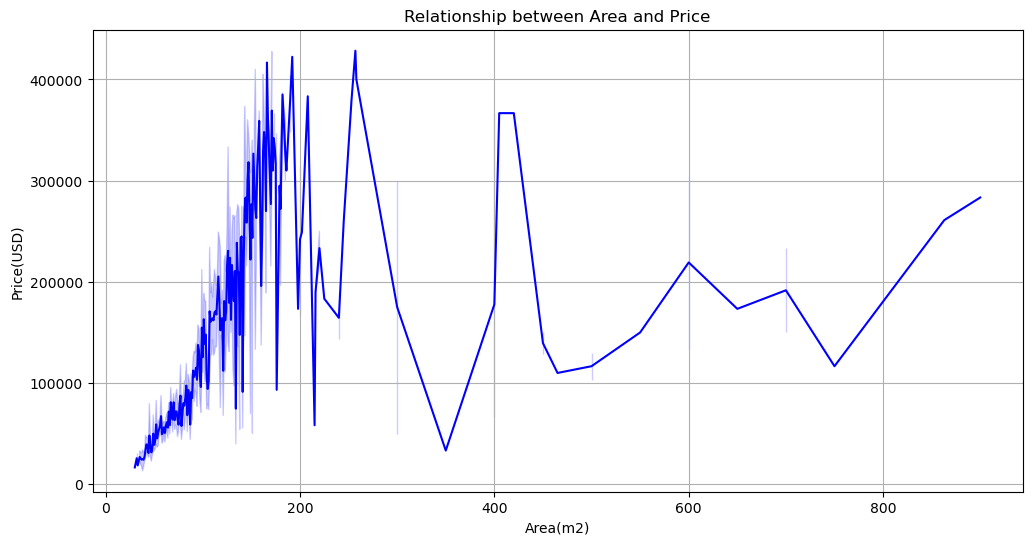

In [32]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Area'], y=df['Price(USD)'], color='blue')
plt.title('Relationship between Area and Price')
plt.xlabel('Area(m2)')
plt.ylabel('Price(USD)')
plt.grid(True)

area_per_price_figure = plt.gcf()

plt.show()

4. Does the number of rooms (Room Column) affect the price of a house?

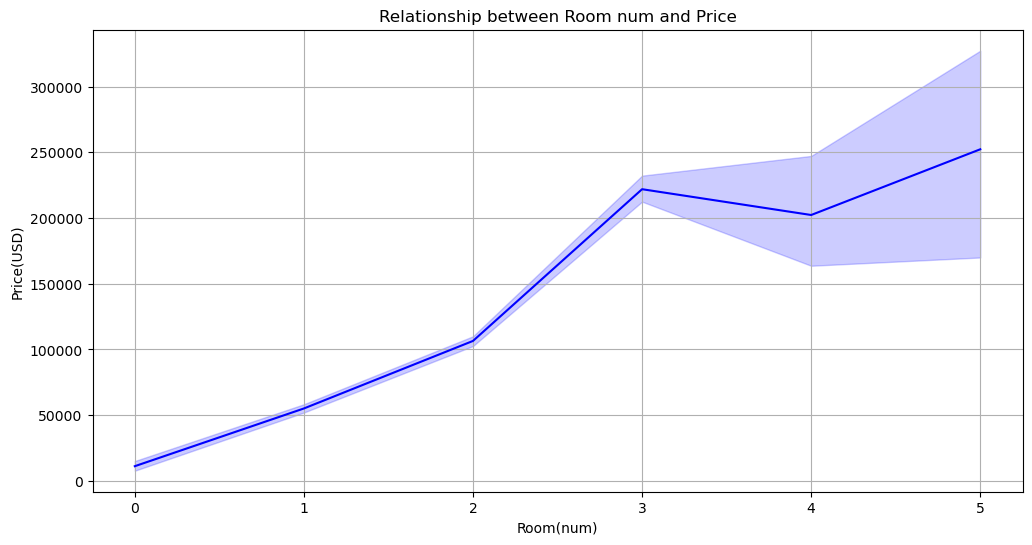

In [33]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Room'], y=df['Price(USD)'], color='blue')
plt.title('Relationship between Room num and Price')
plt.xlabel('Room(num)')
plt.ylabel('Price(USD)')
plt.grid(True)

room_per_price_figure = plt.gcf()

plt.show()

5. Which area has the most expensive houses, and which area has the cheapest houses?

In [34]:
most_expensive_area = df[df['Price(USD)'] == df['Price(USD)'].max()]['Address']
cheap_expensive_area = df[df['Price(USD)'] == df['Price(USD)'].min()]['Address']

print("most expensive houses area: ",most_expensive_area)
print("cheapest expensive houses area: ",cheap_expensive_area)


most expensive houses area:  350    Persian Gulf Martyrs Lake
,Name: Address, dtype: object
,cheapest expensive houses area:  134    Qarchak
,Name: Address, dtype: object


6. Which area has the highest number of houses with parking?

In [35]:
houses_with_parking = df[df['Parking'] == True]

parking_count_by_address = houses_with_parking.groupby('Address').size()

highest_num_house_parking = parking_count_by_address.idxmax()
max_count = parking_count_by_address.max()

area_most_parking_house_num = (df['Area'] == highest_num_house_parking).count()

print(f"Area with highest number of houses with parking: {highest_num_house_parking} (Total Parking: {max_count} , Total House: {area_most_parking_house_num} , Parking per house: {max_count / area_most_parking_house_num }) ")

Area with highest number of houses with parking: Punak (Total Parking: 153 , Total House: 3146 , Parking per house: 0.04863318499682136) 


7. Can you buy a two-room house or a house with parking for $250,000?

In [36]:
can_buy_2room = df[(df['Room'] == 2) & (df['Price(USD)'] <= 250000)]
can_buy_parking = df[(df['Parking'] == True) & (df['Price(USD)'] <= 250000)]

can_buy = pd.concat([can_buy_2room, can_buy_parking])

can_buy = can_buy.drop_duplicates()

can_buy = can_buy.sort_values(by='Price(USD)')

can_buy = can_buy.reset_index(drop=True)
can_buy.index = range(1, len(can_buy) + 1)

print(f"Num of Houses with 2-Room: {can_buy_2room.shape[0]} , Num of Houses with Parking: {can_buy_parking.shape[0]} , Total: {can_buy.shape[0]}" ) 
print(can_buy)

Num of Houses with 2-Room: 1803 , Num of Houses with Parking: 2270 , Total: 2340
,       Area  Room  Parking  Warehouse  Elevator         Address         Price  \
,1      83.0     2     True       True      True           Ozgol  5.500000e+07   
,2      75.0     2     True       True      True          Pardis  6.000000e+07   
,3     110.0     0     True       True      True          Parand  1.020000e+08   
,4      49.0     1     True       True     False        Andisheh  1.100000e+08   
,5      78.0     2     True       True      True          Parand  2.100000e+08   
,...     ...   ...      ...        ...       ...             ...           ...   
,2336   73.0     1     True       True     False  Shahrake Gharb  7.500000e+09   
,2337  135.0     3     True       True      True     Saadat Abad  7.500000e+09   
,2338  112.0     2     True       True     False      Gheitarieh  7.500000e+09   
,2339  120.0     2     True       True      True  Shahrake Gharb  7.500000e+09   
,2340  121.0     

8. Find the 10 most expensive areas and the 10 cheapest areas.

In [37]:
ten_expensive = df.sort_values('Price(USD)', ascending=False)['Address'].reset_index(drop=True).head(10)
ten_expensive.index = range(1, 11)  

ten_cheapest = df.sort_values('Price(USD)')['Address'].reset_index(drop=True).head(10)
ten_cheapest.index = range(1, 11) 

print('10 Expensive House:')
print(ten_expensive)

print()

print('10 Cheapest House:')
print(ten_cheapest)

10 Expensive House:
,1     Persian Gulf Martyrs Lake
,2                       Elahieh
,3                      Niavaran
,4                       Tajrish
,5                     Marzdaran
,6                      Velenjak
,7                Shahrake Gharb
,8                      Aqdasieh
,9                Shahrake Gharb
,10                  Saadat Abad
,Name: Address, dtype: object
,
,10 Cheapest House:
,1         Qarchak
,2           Ozgol
,3          Pardis
,4          Parand
,5        Andisheh
,6        Pakdasht
,7        Pakdasht
,8     Shahedshahr
,9          Parand
,10     Islamshahr
,Name: Address, dtype: object


## Save Result:
After performing the analysis, it is necessary to save the resulting charts and tables:

In [38]:
area_per_price_figure.savefig('area_vs_price.png', dpi=300, bbox_inches='tight')
room_per_price_figure.savefig('room_vs_price.png', dpi=300, bbox_inches='tight')

df.to_csv('df.csv', index=False)
mean_prices.to_csv('mean_prices_area.csv', index=False)
home_count.to_csv('home_count_area.csv', index=False)
houses_with_parking.to_csv('houses_with_parking.csv', index=False)
can_buy_2room.to_csv('house_250k_2room.csv', index=False)
can_buy_parking.to_csv('house_250k_parking.csv', index=False)
can_buy.to_csv('house_parking_2room_250k.csv', index=False)
ten_cheapest.to_csv('ten_cheapest_area.csv', index=True)
ten_expensive.to_csv('ten_expensive_area.csv', index=True)




Data Analyst : Github.com/RezaGooner 

Source of the dataset : Kaggel.com